In [40]:
# ref detector: https://towardsdatascience.com/face-detection-using-mtcnn-a-guide-for-face-extraction-with-a-focus-on-speed-c6d59f82d49
# ref rotation: https://www.kaggle.com/code/gpiosenka/align-crop-resize-save-images-using-mtcnn

import os
import sys

sys.path.append('../tflow/mtcnn')

import cv2
import json
import numpy as np
from tqdm import tqdm
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from imutils.paths import list_images
from utils import load_image, align, crop_image, rotate_bound

In [2]:
# 1. obj detection
# obj: usar mtcnn para detectar regiones de interes y guardarlas en un archivo json
# este preprocesado ayudará en las siguientes etapas.

# 2. make splits
# make splits for each dataset conjunction
# extra: separate them into jsons/txt
# - flickr vs flickr
# - splunk vs splunk
# - flickr vs splunk
# - splunk vs flickr


datasets = {
    'flickr': '/media/choppy/WD_BLACK/datasets/FLICKR',
    'splunk': '/media/choppy/WD_BLACK/datasets/Splunk',
}

verbose = False

In [3]:
# instance detector
# TODO: explore min and max face size of detector inference
detector = MTCNN()

2022-09-26 10:33:20.848617: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 10:33:20.874849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 10:33:20.875251: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 10:33:20.876031: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [116]:
# obj: usar mtcnn para detectar regiones de interes y guardarlas en un archivo json

for dst_key in datasets:
    ds_dir = datasets.get(dst_key)
    images = [*list_images(ds_dir)]
    db_name = os.path.basename(ds_dir)
    json_data = []
    
    print(f"doing inference over {len(images)} images from {db_name}")
    
    for imdir in tqdm(images, desc=dst_key):
        img = load_image(imdir)
        detections = detector.detect_faces(img)
        img_path_dir = imdir.split(db_name)[-1][1:]
        
        # find best detection and biggest bbox
        biggest = 0
        best_det = None
        if len(detections) > 1:
            if verbose: print(f'more than one face detected in img: {imdir}, but only the biggest is stored')
            for det in detections:
                box = det['box']            
                # calculate the area in the image
                area = box[2] * box[3]
                if area > biggest:
                    biggest = area
                    bbox = box
                    best_det = det
        
        # add periocular as extra bbox on detection
        
        
        # continue working with best_det dict
        # construct dict to store json data
        json_data.append({
            'image_dir': os.path.join(db_name, img_path_dir),
            'mtcnn-inference': best_det, 
        })
        
        
        
        break
    
    # store json data as db-name.json
    json.dump(json_data, open(db_name+'.json', 'w'))
    break

doing inference over 14000 images from FLICKR


flickr:   0%|                                                                                                                                                                            | 0/14000 [00:17<?, ?it/s]


In [117]:
json_data

[{'image_dir': 'FLICKR/ronda3/F_print_brillante_plano/F012000_print_brillante_plano_20220325194618.jpg',
  'mtcnn-inference': {'box': [1538, 1994, 3288, 4171],
   'confidence': 0.9999085664749146,
   'keypoints': {'left_eye': (2236, 3634),
    'right_eye': (3749, 3613),
    'nose': (2787, 4595),
    'mouth_left': (2344, 5242),
    'mouth_right': (3609, 5264)}}}]

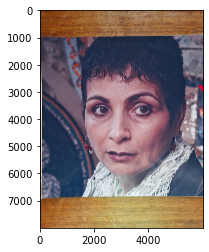

In [118]:
plt.imshow(img)

In [119]:
best_det

{'box': [1538, 1994, 3288, 4171],
 'confidence': 0.9999085664749146,
 'keypoints': {'left_eye': (2236, 3634),
  'right_eye': (3749, 3613),
  'nose': (2787, 4595),
  'mouth_left': (2344, 5242),
  'mouth_right': (3609, 5264)}}

In [120]:
left_eye, right_eye = best_det.get('keypoints')['left_eye'], best_det.get('keypoints')['right_eye']

In [126]:
nose = best_det.get('keypoints')['nose']

In [121]:
left_eye, right_eye

((2236, 3634), (3749, 3613))

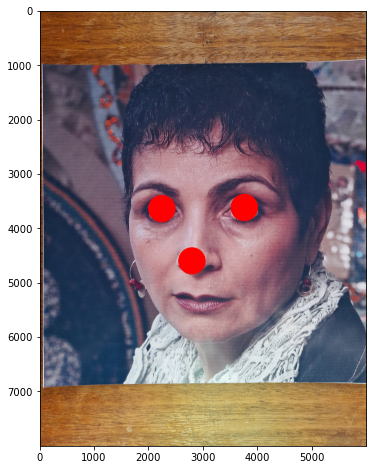

In [127]:
# periocular = aligned[1000:2000, :, ...]
red = [255, 0, 0]
periocular = cv2.circle(img.copy(), left_eye, radius=250, color=red, thickness=-1)
periocular = cv2.circle(periocular, right_eye, radius=250, color=red, thickness=-1)
periocular = cv2.circle(periocular, nose, radius=250, color=red, thickness=-1)
plt.figure(figsize=(10, 8))
plt.imshow(periocular)

In [ ]:
# para hacer zona periocular

# distancia entre cada ojo y agregar 20% de margen izq/der
# para altura, triangular distancia desde los ojos hasta la nariz y estimar un 20-30%

In [123]:
bbox

[1538, 1994, 3288, 4171]

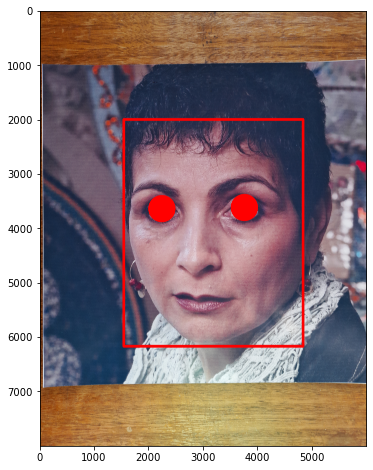

In [125]:
bbox = best_det['box']

periocular = cv2.rectangle(periocular, (bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]), color=red, thickness=50)
plt.figure(figsize=(10, 8))
plt.imshow(periocular)

In [ ]:
# calculate a proportion from face to eye and extract

In [3]:
# check if it works
image_path = images[19]
img = load_image(image_path)

detections = detector.detect_faces(img)
detections

2022-09-13 13:26:16.868018: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-13 13:26:16.894486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-13 13:26:16.894894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-13 13:26:16.895520: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

[{'box': [90, 80, 74, 101],
  'confidence': 0.999299168586731,
  'keypoints': {'left_eye': (109, 113),
   'right_eye': (142, 117),
   'nose': (121, 135),
   'mouth_left': (108, 154),
   'mouth_right': (133, 157)}}]

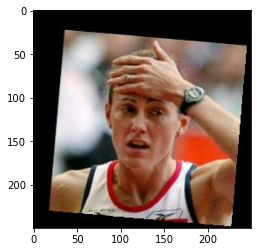

In [4]:
plt.imshow(img)

In [7]:
_crop = crop_image(load_image(image_path), detections)
aligned = align(_crop, detections)

In [8]:
image_path

'/home/choppy/TOC/datasets/LFW/archive/lfw-deepfunneled/lfw-deepfunneled/Hayley_Tullett/Hayley_Tullett_0002.jpg'

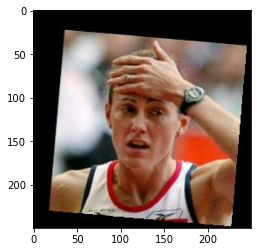

In [9]:
plt.imshow(load_image(image_path))

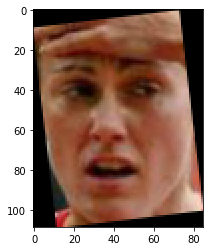

In [10]:
plt.imshow(aligned)

In [16]:
os.makedirs(dst_dataset, exist_ok=True)

for imdir in tqdm(images):
    img = load_image(imdir)
    detections = detector.detect_faces(img)
    
    if detections:
        _crop = crop_image(img, detections)
        aligned = align(_crop, detections)

        name_info = imdir.split(dataset)[-1][1:]
        name_info_dirname = os.path.dirname(name_info)
        os.makedirs(os.path.join(dst_dataset, name_info_dirname), exist_ok=True)

        aligned_bgr = cv2.cvtColor(aligned, cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join(dst_dataset, name_info), aligned_bgr)
    else:
        # save image as is
        name_info = imdir.split(dataset)[-1][1:]
        name_info_dirname = os.path.dirname(name_info)
        os.makedirs(os.path.join(dst_dataset, name_info_dirname), exist_ok=True)
        cv2.imwrite(os.path.join(dst_dataset, name_info), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13233/13233 [1:05:59<00:00,  3.34it/s]
